<a href="https://colab.research.google.com/github/minjcop/AI-ML-DL/blob/master/kddcup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [3]:
import os
import tarfile
from six.moves import urllib

In [26]:
 cd '/content/gdrive/My Drive/Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks


In [28]:
import pandas as pd

kdd_data = pd.read_csv('kddcup_data_10_percent_corrected.csv')

In [29]:
kdd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

In [30]:
kdd_data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [32]:
kdd_data['tcp'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: tcp, dtype: int64

In [67]:
kdd_data['http'].value_counts()



ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
red_i           1
tftp_u          1
pm_dump         1
Name: http, Length: 66, dtype: int64

In [73]:
kdd_data = kdd_data.drop(['http','tcp', 'SF', 'normal.'], axis = 1)

In [34]:
kdd_data.describe()

,0,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028997,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142398,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(kdd_data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

395216 train + 98804 test


In [46]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio *2**32
def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]


In [48]:
kdd_with_id = kdd_data.reset_index()
train_set, test_set = split_train_test_by_id(kdd_with_id, 0.2, 'index')

In [65]:
corr_matrix = kdd_data.corr()
corr_matrix = corr_matrix.drop('0.1')
corr_matrix = corr_matrix.drop('0.2')
corr_matrix = corr_matrix.drop('0.3')
corr_matrix = corr_matrix.drop('0.5')
corr_matrix = corr_matrix.drop('0.7')
corr_matrix = corr_matrix.drop('0.8')
corr_matrix = corr_matrix.drop('0.9')
corr_matrix = corr_matrix.drop('0.10')
corr_matrix = corr_matrix.drop('0.11')
corr_matrix = corr_matrix.drop('0.13')
corr_matrix = corr_matrix.drop('0.14')
corr_matrix


,0,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,0.021340,0.055853,0.056766,0.074562,-0.000169,0.025661,NaN,NaN,0.023424,-0.105154,-0.080250,-0.031416,-0.031378,0.012053,0.012106,0.021771,0.051800,-0.011790,0.010073,-0.117516,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
181,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,-0.000022,-0.000010,-0.000010,0.000013,0.000005,-0.000052,NaN,NaN,-0.000082,-0.003098,-0.002501,0.001558,0.001114,0.000591,0.001379,-0.001860,0.006207,-0.000015,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
5450,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004366,0.049330,0.047814,0.023298,0.031680,0.075656,0.020746,0.004958,0.000144,0.008746,NaN,NaN,0.001289,-0.040372,-0.030544,-0.011907,-0.011930,-0.006166,-0.005807,0.014002,-0.005702,0.008135,-0.048868,-0.005849,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
0.4,0.013213,0.004483,0.004366,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105306,0.007348,0.024065,-0.000206,0.000998,0.025247,0.006373,0.001902,NaN,NaN,0.843572,-0.068451,-0.052164,-0.020264,-0.020217,-0.008305,-0.005822,0.022697,-0.002686,0.001973,-0.026367,-0.038731,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
1,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105306,-0.001145,1.000000,0.013612,0.025293,0.011208,0.013519,0.026923,0.023776,0.066233,NaN,NaN,0.089319,-0.634641,-0.478120,-0.191697,-0.191112,-0.099136,-0.094372,0.219684,-0.072691,0.330676,-0.621023,0.119324,0.161068,-0.061150,-0.461556,0.140495,-0.190954,-0.191703,-0.090868,-0.087885
0.6,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,0.255557,0.701400,0.993828,0.010934,0.009341,0.412238,NaN,NaN,-0.000212,-0.008792,-0.006704,-0.002597,-0.002618,-0.001049,-0.000478,0.003012,-0.001338,0.000770,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873
0.12,0.025661,-0.000052,0.008746,-0.000184,-0.001319,0.020068,0.001902,0.003305,0.066233,0.412238,0.152217,0.320283,0.413605,0.079682,0.024901,1.000000,NaN,NaN,0.001953,-0.042663,-0.032368,-0.012714,-0.012665,-0.006852,-0.004272,0.014341,-0.003813,0.025210,-0.021152,-0.000801,0.004395,0.002102,-0.032291,0.000740,-0.012330,-0.012065,-0.006611,-0.006780
0.15,0.023424,-0.000082,0.001289,-0.000249,-0.001778,-0.000096,0.843572,-0.000365,0.089319,-0.000212,-0.000393,-0.000174,-0.000210,0.014251,-0.000370,0.001953,NaN,NaN,1.000000,-0.057909,-0.044156,-0.017150,-0.017129,-0.008887,-0.009030,0.018608,0.002129,-0.005296,-0.033787,-0.050016,-0.043189,0.009624,-0.045139,-0.005627,-0.016196,-0.017197,-0.007556,-0.008693
8,-0.105154,-0.003098,-0.040372,-0.010260,-0.061935,-0.003997,-0.068451,-0.015185,-0.634641,-0.008792,-0.016224,-0.007267,-0.008762,-0.017380,-0.015149,-0.042663,NaN,NaN,-0.057909,1.000000,0.943667,-0.310690,-0.310335,-0.206971,-0.208446,0.353737,-0.175301,-0.314212,0.532629,0.514579,0.468779,-0.262109,0.860579,-0.244574,-0.311193,-0.309712,-0.211759,-0.208052
8.1,-0.080250,-0.002501,-0.030544,-0.007886,-0.047789,-0.003047,-0.052164,-0.011578,-0.478120,-0.006704,-0.012343,-0.005540,-0.006677,-0.013260,-0.011516,-0.032368,NaN,NaN,-0.044156,0.943667,1.000000,-0.530944,-0.530347,-0.286886,-0.287681,0.615568,-0.295736,-0.235633,0.401533,0.718451,0.687996,-0.328594,0.944926,-0.183216,-0.531344,-0.529982,-0.291105,-0.288451


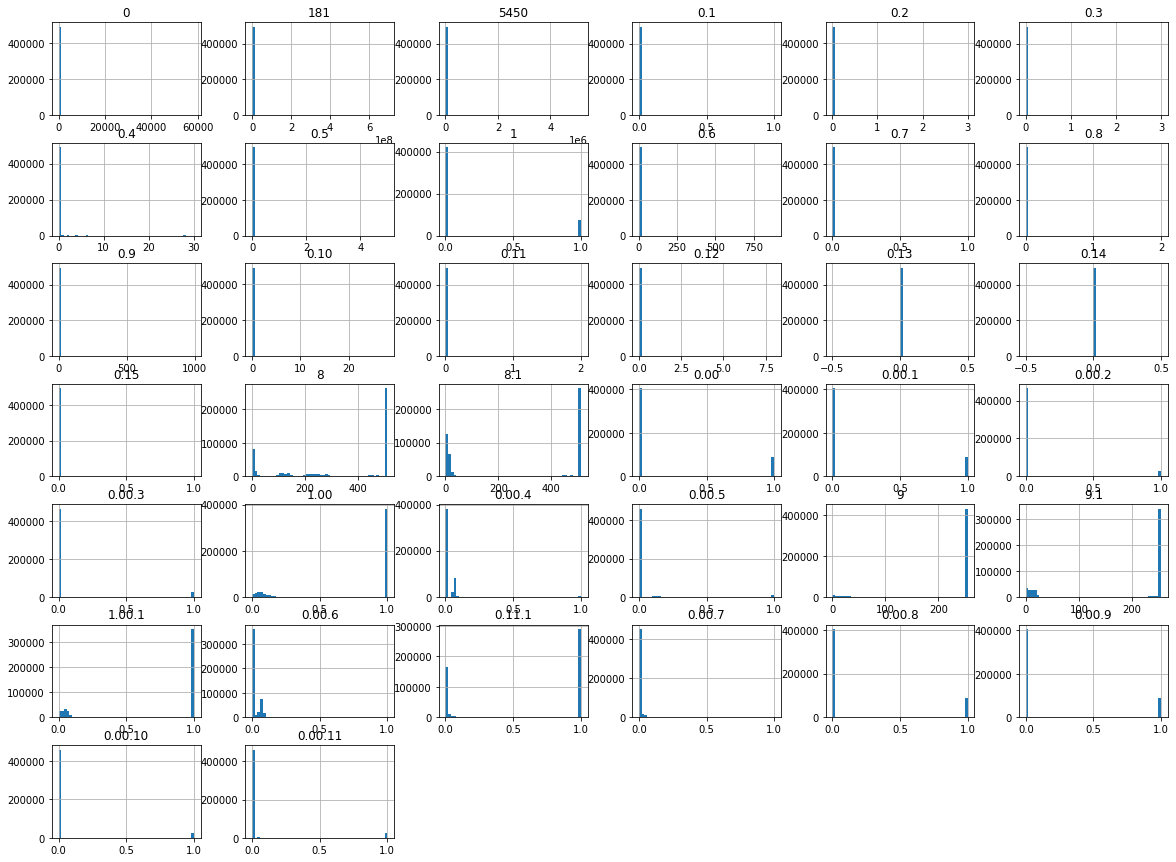

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
kdd_data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [76]:
from sklearn.preprocessing import minmax_scale

kdd_minmax = minmax_scale(kdd_data, axis = 0, copy = True)
kdd_minmax


array([[0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.15846112e-07, 2.59336301e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00]])